In [559]:
#Import the neccessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [560]:
#Import the sales data 
#url : https://catalog.data.gov/dataset/mva-vehicle-sales-counts-by-month-for-calendar-year-2002-2020-up-to-october
sales_data_month = pd.read_csv('MVA_Vehicle_Sales_Counts_by_Month_for_Calendar_Year_2002_through_October_2023.csv')
sales_data_month

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410
...,...,...,...,...,...,...
257,2023,JUN,27001,50613,1214340987,814275863
258,2023,JUL,26360,49502,1196918451,887723892
259,2023,AUG,25876,52725,1222581892,908454060
260,2023,SEP,23892,45386,1134437699,744676584


In [561]:
#Remove any spaces in the list of columns.
sales_data_month.columns = sales_data_month.columns.str.strip()
sales_data_month.columns

Index(['Year', 'Month', 'New', 'Used', 'Total Sales New', 'Total Sales Used'], dtype='object')

In [562]:
#Check to see if there are any missing values from the data
sales_data_month.isnull().sum()

Year                0
Month               0
New                 0
Used                0
Total Sales New     0
Total Sales Used    0
dtype: int64

In [563]:
#Create a new column, called 'Total Cars' which combines 'New' column and 'Used' column.
sales_data_month['Total Cars'] = sales_data_month['New'] + sales_data_month['Used']
sales_data_month

,Year,Month,New,Used,Total Sales New,Total Sales Used,Total Cars
0,2002,JAN,31106,49927,755015820,386481929,81033
1,2002,FEB,27520,50982,664454223,361353242,78502
2,2002,MAR,34225,58794,805666244,419385387,93019
3,2002,APR,36452,59817,846368297,433061150,96269
4,2002,MAY,37359,60577,855005784,442569410,97936
...,...,...,...,...,...,...,...
257,2023,JUN,27001,50613,1214340987,814275863,77614
258,2023,JUL,26360,49502,1196918451,887723892,75862
259,2023,AUG,25876,52725,1222581892,908454060,78601
260,2023,SEP,23892,45386,1134437699,744676584,69278


In [564]:
#Create a new column, called 'Total Sales' which combines the 'Total Sales New' and 'Total Sales Used'
sales_data_month['Total Sales'] = sales_data_month['Total Sales New'] + sales_data_month['Total Sales Used']
sales_data_month

,Year,Month,New,Used,Total Sales New,Total Sales Used,Total Cars,Total Sales
0,2002,JAN,31106,49927,755015820,386481929,81033,1141497749
1,2002,FEB,27520,50982,664454223,361353242,78502,1025807465
2,2002,MAR,34225,58794,805666244,419385387,93019,1225051631
3,2002,APR,36452,59817,846368297,433061150,96269,1279429447
4,2002,MAY,37359,60577,855005784,442569410,97936,1297575194
...,...,...,...,...,...,...,...,...
257,2023,JUN,27001,50613,1214340987,814275863,77614,2028616850
258,2023,JUL,26360,49502,1196918451,887723892,75862,2084642343
259,2023,AUG,25876,52725,1222581892,908454060,78601,2131035952
260,2023,SEP,23892,45386,1134437699,744676584,69278,1879114283


In [565]:
#First step is to create a time series graph of time and 'Total Sales'
#Need to convert columns 'Year' and 'Month' into a timestamp
#The first process is to create a column named 'Day' which starts at the beginning of every month
#Creating a NumPy array where the size is the number of observations in the sales_data_month dataframe
#Insert the column 'Day' to the right of 'Month' to improve consistiency of column order
Day = np.ones(sales_data_month.shape[0])
Day = Day.astype('int64')
sales_data_month.insert(2, 'Day', Day)
sales_data_month

,Year,Month,Day,New,Used,Total Sales New,Total Sales Used,Total Cars,Total Sales
0,2002,JAN,1,31106,49927,755015820,386481929,81033,1141497749
1,2002,FEB,1,27520,50982,664454223,361353242,78502,1025807465
2,2002,MAR,1,34225,58794,805666244,419385387,93019,1225051631
3,2002,APR,1,36452,59817,846368297,433061150,96269,1279429447
4,2002,MAY,1,37359,60577,855005784,442569410,97936,1297575194
...,...,...,...,...,...,...,...,...,...
257,2023,JUN,1,27001,50613,1214340987,814275863,77614,2028616850
258,2023,JUL,1,26360,49502,1196918451,887723892,75862,2084642343
259,2023,AUG,1,25876,52725,1222581892,908454060,78601,2131035952
260,2023,SEP,1,23892,45386,1134437699,744676584,69278,1879114283


In [566]:
#Column 'Day' has been added. The next step is to convert column 'Month' into a numerical list.
#Map the months of year to a numerical value as January, February, ..., December to 1,2,...,12
#Uppercase the column 'Months' to reduce case sensitivity errors
numericalMonth = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9,
       'OCT':10, 'NOV':11, 'DEC':12}
sales_data_month['Month'] = sales_data_month['Month'].str.upper().map(numericalMonth)

In [567]:
#Let's check that column 'Year' is the correct datatype (int64)
sales_data_month['Year'].dtype

dtype('int64')

In [568]:
# Create a new 'Date' column by combining columns 'Year', 'Month' and 'Day'
#Insert it at the beginning of the column order as it makes most sense to
date = pd.to_datetime(sales_data_month[['Year', 'Month', 'Day']])
sales_data_month.insert(0, 'Date', date)
sales_data_month

,Date,Year,Month,Day,New,Used,Total Sales New,Total Sales Used,Total Cars,Total Sales
0,2002-01-01,2002,1,1,31106,49927,755015820,386481929,81033,1141497749
1,2002-02-01,2002,2,1,27520,50982,664454223,361353242,78502,1025807465
2,2002-03-01,2002,3,1,34225,58794,805666244,419385387,93019,1225051631
3,2002-04-01,2002,4,1,36452,59817,846368297,433061150,96269,1279429447
4,2002-05-01,2002,5,1,37359,60577,855005784,442569410,97936,1297575194
...,...,...,...,...,...,...,...,...,...,...
257,2023-06-01,2023,6,1,27001,50613,1214340987,814275863,77614,2028616850
258,2023-07-01,2023,7,1,26360,49502,1196918451,887723892,75862,2084642343
259,2023-08-01,2023,8,1,25876,52725,1222581892,908454060,78601,2131035952
260,2023-09-01,2023,9,1,23892,45386,1134437699,744676584,69278,1879114283


In [569]:
#Drop columns 'Year', 'Moth' and 'Day'
sales_data_month.drop(columns={'Year','Month','Day'},inplace=True)
sales_data_month

,Date,New,Used,Total Sales New,Total Sales Used,Total Cars,Total Sales
0,2002-01-01,31106,49927,755015820,386481929,81033,1141497749
1,2002-02-01,27520,50982,664454223,361353242,78502,1025807465
2,2002-03-01,34225,58794,805666244,419385387,93019,1225051631
3,2002-04-01,36452,59817,846368297,433061150,96269,1279429447
4,2002-05-01,37359,60577,855005784,442569410,97936,1297575194
...,...,...,...,...,...,...,...
257,2023-06-01,27001,50613,1214340987,814275863,77614,2028616850
258,2023-07-01,26360,49502,1196918451,887723892,75862,2084642343
259,2023-08-01,25876,52725,1222581892,908454060,78601,2131035952
260,2023-09-01,23892,45386,1134437699,744676584,69278,1879114283


In [570]:
#Make date the index so that we can see 
sales_data_month.index = pd.to_datetime(sales_data_month.index)
sales_data_month.set_index('Date', inplace=True)

In [571]:
#Create a function called 'Create_Time_Series' which can be done for simple Time Series Graphs
def time_series(xdata,ydata,title,xlabel,ylabel):
    plt.plot_date(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

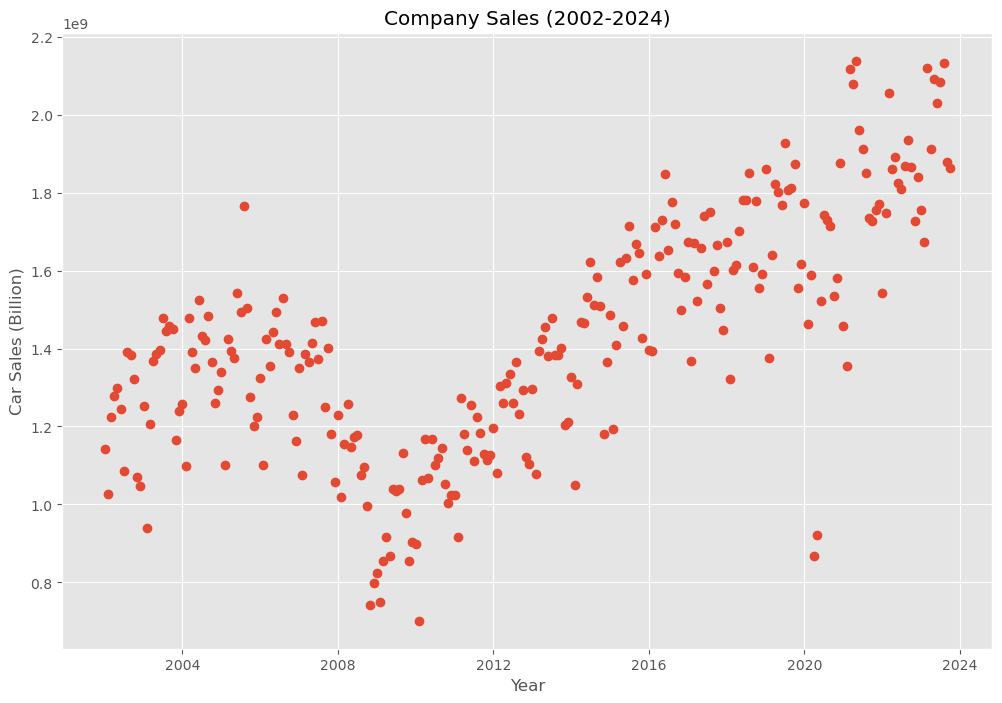

In [572]:
#Graph column 'Date' compared to 'Total Sales' to gain an insight of the companies sales.
company_sales = time_series(sales_data_month.index,sales_data_month['Total Sales'], 'Company Sales (2002-2024)', 'Year', 'Car Sales (Billions of USD)')

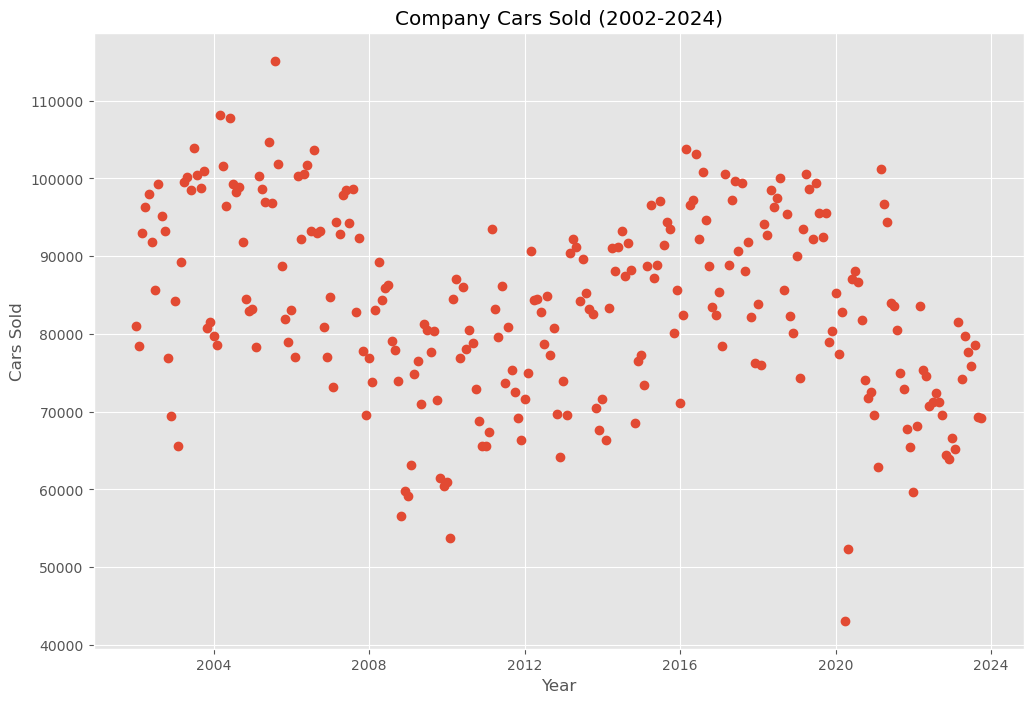

In [617]:
#There is a pretty clear pattern above between Year and Total Sales
#The next goal is to see the pattern between column 'Date' and 'Total Cars'
#This will help determine if the increase in total sales of the company is due to an increase in car sales or not 
#Plot the graph of Year vs Cars Sold
cars_sold = time_series(sales_data_month.index,sales_data_month['Total Cars'], 'Company Cars Sold (2002-2024)', 'Year', 'Cars Sold')

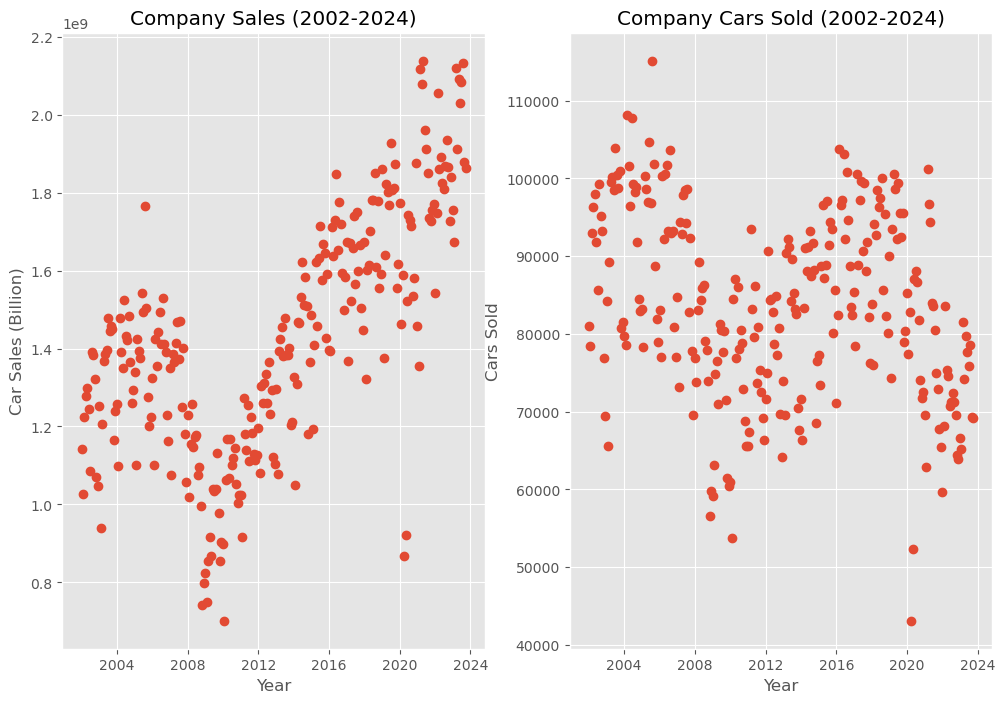

In [574]:
#There is no clear pattern from the graph of 'Year' versus 'Cars Sold'
#There is a dip in 2008 and 2020 for 'Cars Sold' due to the Financial Crises and the 2020 Coronavirus Pandemic
#Compare the two graphs side by side
plt.subplot(1,2,1)
time_series(sales_data_month.index,sales_data_month['Total Sales'], 'Company Sales (2002-2024)', 'Year', 'Car Sales (Billion)')

plt.subplot(1,2,2)
cars_sold = time_series(sales_data_month.index,sales_data_month['Total Cars'], 'Company Cars Sold (2002-2024)', 'Year', 'Cars Sold')

In [575]:
#If you get the total sales and divide by total number of cars for each month, this will give the average price of the cars for that month
#Create a new column that has the average price of the car
#If you have the average price of the car then you are able to see how the average price of the car compares with inflation
sales_data_month['Average Price'] = sales_data_month['Total Sales'] / sales_data_month['Total Cars']
sales_data_month

,New,Used,Total Sales New,Total Sales Used,Total Cars,Total Sales,Average Price
Date,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,14086.825725
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,13067.278095
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,13169.907557
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,13290.149965
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,13249.215753
...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,26137.254232
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,27479.401321
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,27112.071755


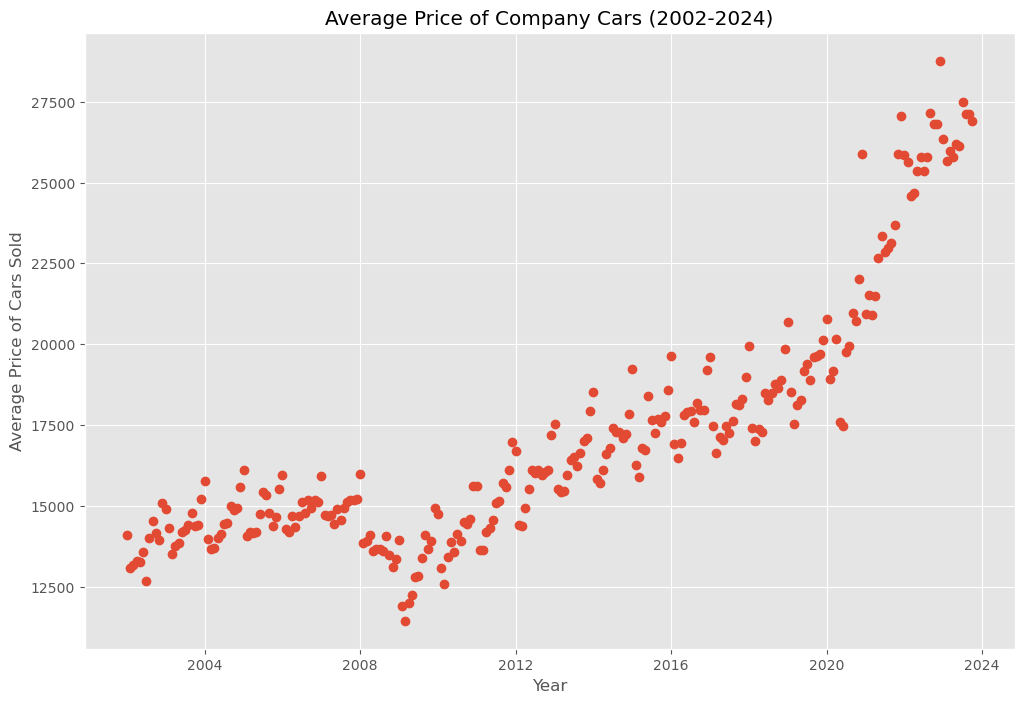

In [576]:
#Plot the column 'Date' with new column 'Average Price'
time_series(sales_data_month.index,sales_data_month['Average Price'],'Average Price of Company Cars (2002-2024)', 'Year','Average Price of Cars Sold')

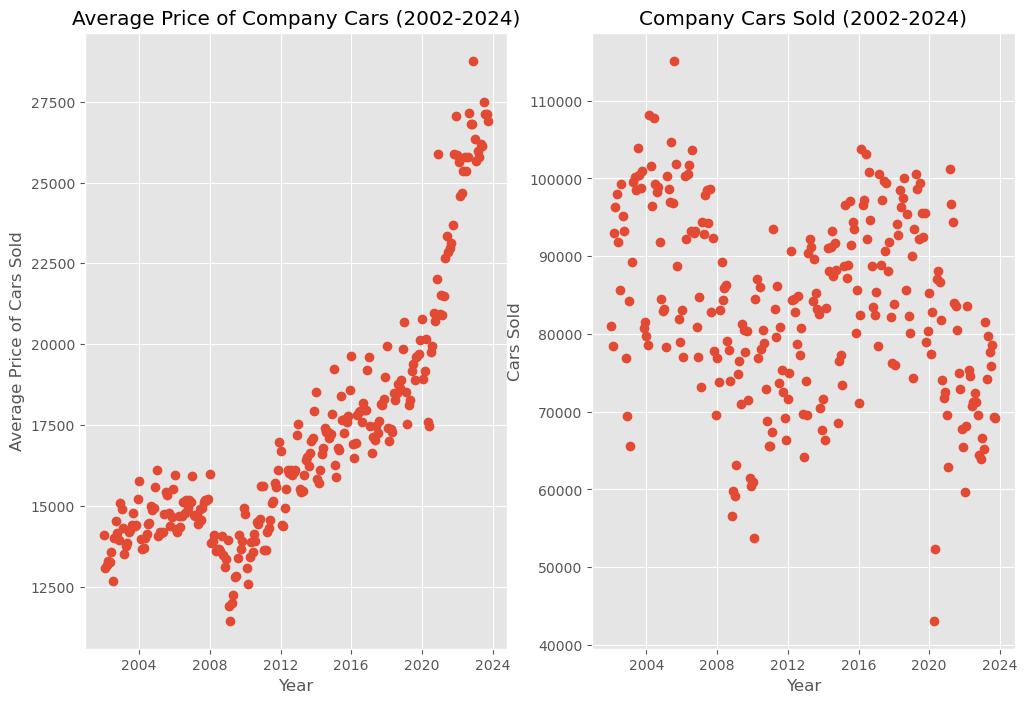

In [577]:
#The average price of the car has increased but number of cars sold has not
#This could be for the following reasons
#1 Inflation
#2 More new cars are being sold at the company compared to old cars

#First I am going to be exploring how inflation may have impacted this

#By exploring inflation rate versus average price, I am able to have a better idea of the increase in price of the car is due to
# a) inflation or b) the price that the company sells the car for

plt.subplot(1,2,1)
time_series(sales_data_month.index,sales_data_month['Average Price'],'Average Price of Company Cars (2002-2024)', 'Year','Average Price of Cars Sold')

plt.subplot(1,2,2)
cars_sold = time_series(sales_data_month.index,sales_data_month['Total Cars'], 'Company Cars Sold (2002-2024)', 'Year', 'Cars Sold')

In [578]:
#Let's compare the Inflation Rate (CPI or Consumer Price Index) since 2002 and compare that to the Average Price of Company Cars
#The following sales_data_month is the Consumer Price Index for all Urban Consumers (CPI-U)
#Years 2002-2023
#This includes all items less food and energy
#URL:https://data.bls.gov/timeseries/CUUR0000SA0L1E?output_view=pct_12mths
#Import the inflation sales_data_month
Inflation = pd.read_excel('Inflation Rate data.xlsx')
Inflation

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,2002,2.6,2.6,2.4,2.5,2.5,2.3,2.2,2.4,2.2,2.2,2.0,1.9,2.5,2.2
1,2003,1.9,1.7,1.7,1.5,1.6,1.5,1.5,1.3,1.2,1.3,1.1,1.1,1.7,1.3
2,2004,1.1,1.2,1.6,1.8,1.7,1.9,1.8,1.7,2.0,2.0,2.2,2.2,1.6,2.0
3,2005,2.3,2.4,2.3,2.2,2.2,2.0,2.1,2.1,2.0,2.1,2.1,2.2,2.2,2.1
4,2006,2.1,2.1,2.1,2.3,2.4,2.6,2.7,2.8,2.9,2.7,2.6,2.6,2.2,2.7
5,2007,2.7,2.7,2.5,2.3,2.2,2.2,2.2,2.1,2.1,2.2,2.3,2.4,2.4,2.3
6,2008,2.5,2.3,2.4,2.3,2.3,2.4,2.5,2.5,2.5,2.2,2.0,1.8,2.3,2.3
7,2009,1.7,1.8,1.8,1.9,1.8,1.7,1.5,1.4,1.5,1.7,1.7,1.8,1.8,1.6
8,2010,1.6,1.3,1.1,0.9,0.9,0.9,0.9,0.9,0.8,0.6,0.8,0.8,1.1,0.8
9,2011,1.0,1.1,1.2,1.3,1.5,1.6,1.8,2.0,2.0,2.1,2.2,2.2,1.3,2.0


In [579]:
#The sales_data_month processing component
#Drop half1 and half 2
Inflation.drop(columns={'HALF1', 'HALF2'}, inplace=True)

In [580]:
#The format of dataframe 'Inflation' does not suit
#We need to recreate this dataframe so that it is in a time-series format
# Reshaping the sales_data_monthFrame to a long format
inflation_data = pd.melt(Inflation, id_vars=['Year'], var_name='Month', value_name='Value')
inflation_data

,Year,Month,Value
0,2002,Jan,2.6
1,2003,Jan,1.9
2,2004,Jan,1.1
3,2005,Jan,2.3
4,2006,Jan,2.1
...,...,...,...
259,2019,Dec,2.3
260,2020,Dec,1.6
261,2021,Dec,5.5
262,2022,Dec,5.7


In [581]:
# Creating a datetime column in the format of a time series table
inflation_data.index = pd.to_datetime(inflation_data['Year'].astype(str) + '-' + inflation_data['Month'], format='%Y-%b')

In [582]:
# Sorting the dataFrame by date
inflation_data = inflation_data.sort_index()
inflation_data

,Year,Month,Value
2002-01-01,2002,Jan,2.6
2002-02-01,2002,Feb,2.6
2002-03-01,2002,Mar,2.4
2002-04-01,2002,Apr,2.5
2002-05-01,2002,May,2.5
...,...,...,...
2023-08-01,2023,Aug,4.3
2023-09-01,2023,Sep,4.1
2023-10-01,2023,Oct,4.0
2023-11-01,2023,Nov,4.0


In [583]:
#Drop the columns that are not neccessary
inflation_data.drop(columns={'Year', 'Month'},inplace=True)
inflation_data

,Value
2002-01-01,2.6
2002-02-01,2.6
2002-03-01,2.4
2002-04-01,2.5
2002-05-01,2.5
...,...
2023-08-01,4.3
2023-09-01,4.1
2023-10-01,4.0
2023-11-01,4.0


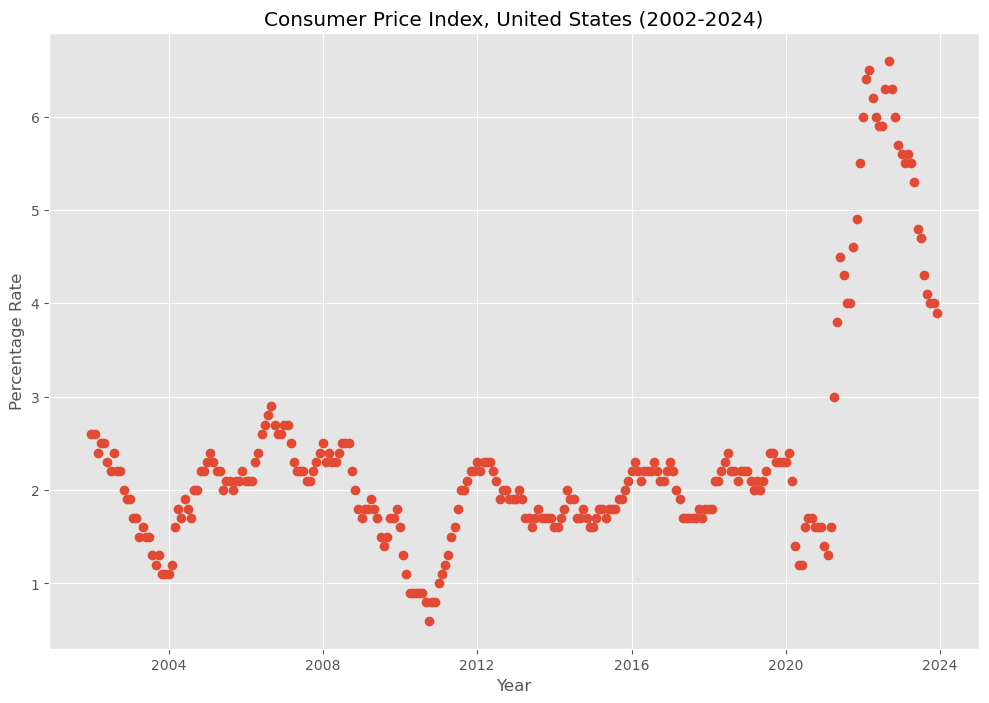

In [584]:
#Create a time series graph of the inflation rate from 2002-2024
time_series(inflation_data.index, inflation_data['Value'], 'Consumer Price Index, United States (2002-2024)','Year','Percentage Rate')

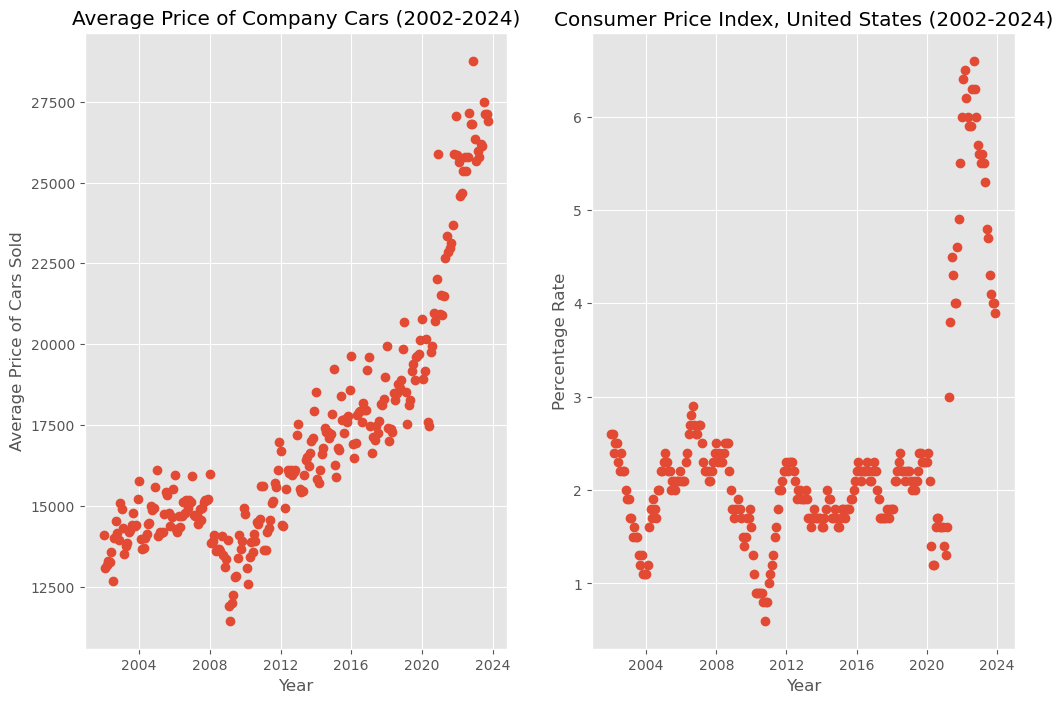

In [585]:
 #Let's compare the two side by side
plt.subplot(1,2,1)
time_series(sales_data_month.index,sales_data_month['Average Price'],'Average Price of Company Cars (2002-2024)', 'Year','Average Price of Cars Sold')

plt.subplot(1,2,2)
time_series(inflation_data.index, inflation_data['Value'], 'Consumer Price Index, United States (2002-2024)','Year','Percentage Rate')

In [586]:
#There is a clear pattern that they follow
#For further analysis, convert the average price graph into a percentage change from last month to this month
sales_data_month['Percentage Difference Monthly'] = sales_data_month['Average Price'].pct_change() * 100
sales_data_month

,New,Used,Total Sales New,Total Sales Used,Total Cars,Total Sales,Average Price,Percentage Difference Monthly
Date,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,14086.825725,NaN
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,13067.278095,-7.237597
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,13169.907557,0.785393
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,13290.149965,0.913009
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,13249.215753,-0.308004
...,...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,26137.254232,-0.222880
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,27479.401321,5.134996
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,27112.071755,-1.336745


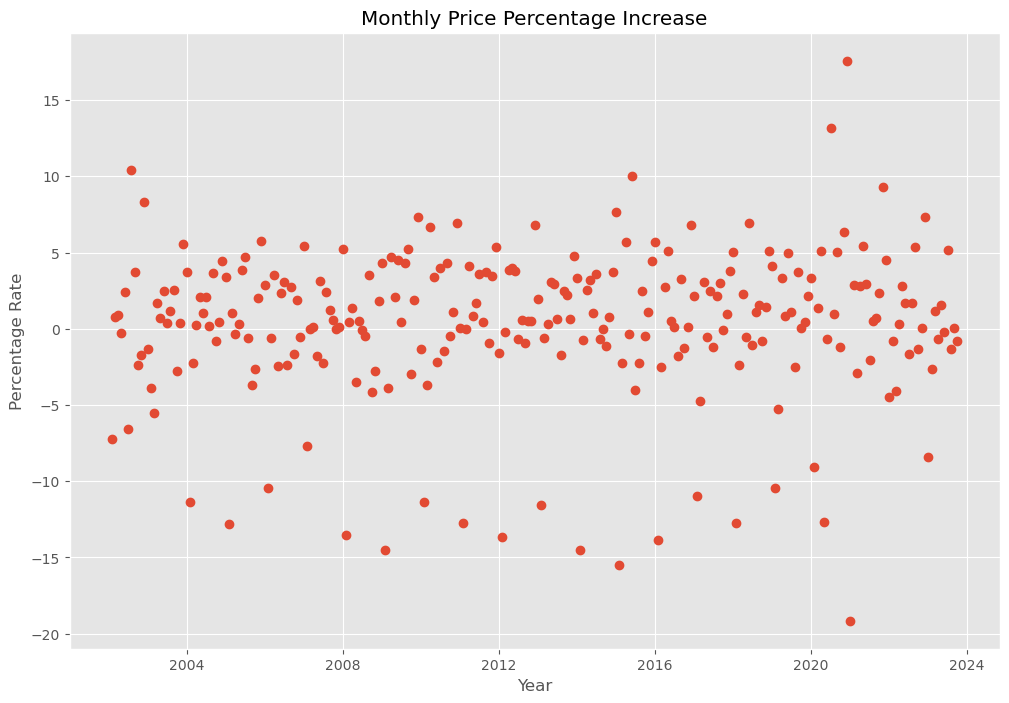

In [587]:
#Graph the new column 'Percentage Difference Monthly' against 'Date'
time_series(sales_data_month.index, sales_data_month['Percentage Difference Monthly'], 'Monthly Price Percentage Increase', 'Year', 'Percentage Rate')

In [613]:
# Create an empty DataFrame to store the yearly totals for each column
sales_data_month_year = pd.DataFrame(index=sales_data_month.index.year.unique())

# Iterate through each column of sales_data_month
for column in sales_data_month.columns:
    # Check if the column is numeric (assuming you want to calculate totals for numeric columns)
    if pd.api.types.is_numeric_dtype(sales_data_month[column]):
        # Calculate the yearly totals for the current column and store in yearly_totals_df
        sales_data_month_year[column] = sales_data_month.groupby(sales_data_month.index.year)[column].sum()

sales_data_month_year.index = pd.to_datetime(sales_data_month_year.index, format='%Y')

# Display the resulting DataFrame with yearly totals for each column
print(sales_data_month_year)

               New    Used  Total Sales New  Total Sales Used  Total Cars  \
Date                                                                        
2002-01-01  402164  656089       9572554876        4940209772     1058253   
2003-01-01  428252  675358      10623148339        5166071497     1103610   
2004-01-01  428508  699677      10972956024        5385548947     1128185   
2005-01-01  421834  703835      11006733922        5639803515     1125669   
2006-01-01  399282  696968      10411657206        5865687318     1096250   
2007-01-01  378184  678549       9997917483        5794213869     1056733   
2008-01-01  309159  617885       7975401987        4896167840      927044   
2009-01-01  248928  608889       6686217914        4510040527      857817   
2010-01-01  268022  626045       7460915522        5054802303      894067   
2011-01-01  287669  625728       8331732402        5345074083      913397   
2012-01-01  316762  627678       9284994339        5582127071      944440   

In [616]:
#I want to ensure that the integrity of the relationship between the columns remains true.
for index, row in sales_data_month_year.iterrows():
    if row['New'] + row['Used'] == row['Total Cars']:
        print("Condition is True for row", index)

Condition is True for row 2002-01-01 00:00:00
Condition is True for row 2003-01-01 00:00:00
Condition is True for row 2004-01-01 00:00:00
Condition is True for row 2005-01-01 00:00:00
Condition is True for row 2006-01-01 00:00:00
Condition is True for row 2007-01-01 00:00:00
Condition is True for row 2008-01-01 00:00:00
Condition is True for row 2009-01-01 00:00:00
Condition is True for row 2010-01-01 00:00:00
Condition is True for row 2011-01-01 00:00:00
Condition is True for row 2012-01-01 00:00:00
Condition is True for row 2013-01-01 00:00:00
Condition is True for row 2014-01-01 00:00:00
Condition is True for row 2015-01-01 00:00:00
Condition is True for row 2016-01-01 00:00:00
Condition is True for row 2017-01-01 00:00:00
Condition is True for row 2018-01-01 00:00:00
Condition is True for row 2019-01-01 00:00:00
Condition is True for row 2020-01-01 00:00:00
Condition is True for row 2021-01-01 00:00:00
Condition is True for row 2022-01-01 00:00:00
Condition is True for row 2023-01-

In [589]:
#'Monthly Price Increase' graph shows no clear pattern, so I am going to find the year by year change in price

#Find the average price of car sold from each year to find the average price for the calendar year
yearly_average_price = sales_data_month['Average Price'].resample('Y').mean()
#A new dataframe must be created because there are far more months than there are years
#Create new dataframe to fit new year by year analysis
sales_data_month_year = pd.DataFrame(yearly_average_price)
sales_data_month_year

,Average Price
Date,
2002-12-31,13734.453330
2003-12-31,14323.490005
2004-12-31,14543.437484
2005-12-31,14793.510397
2006-12-31,14867.211868
2007-12-31,14960.669905
2008-12-31,13860.835066
2009-12-31,13091.768149
2010-12-31,14036.054864


In [590]:
#Now make this a percentage difference.
sales_data_month_year['Percentage Difference Yearly'] = sales_data_month_year['Average Price'].pct_change() * 100
sales_data_month_year

,Average Price,Percentage Difference Yearly
Date,,
2002-12-31,13734.453330,NaN
2003-12-31,14323.490005,4.288752
2004-12-31,14543.437484,1.535572
2005-12-31,14793.510397,1.719490
2006-12-31,14867.211868,0.498201
2007-12-31,14960.669905,0.628618
2008-12-31,13860.835066,-7.351508
2009-12-31,13091.768149,-5.548489
2010-12-31,14036.054864,7.212828


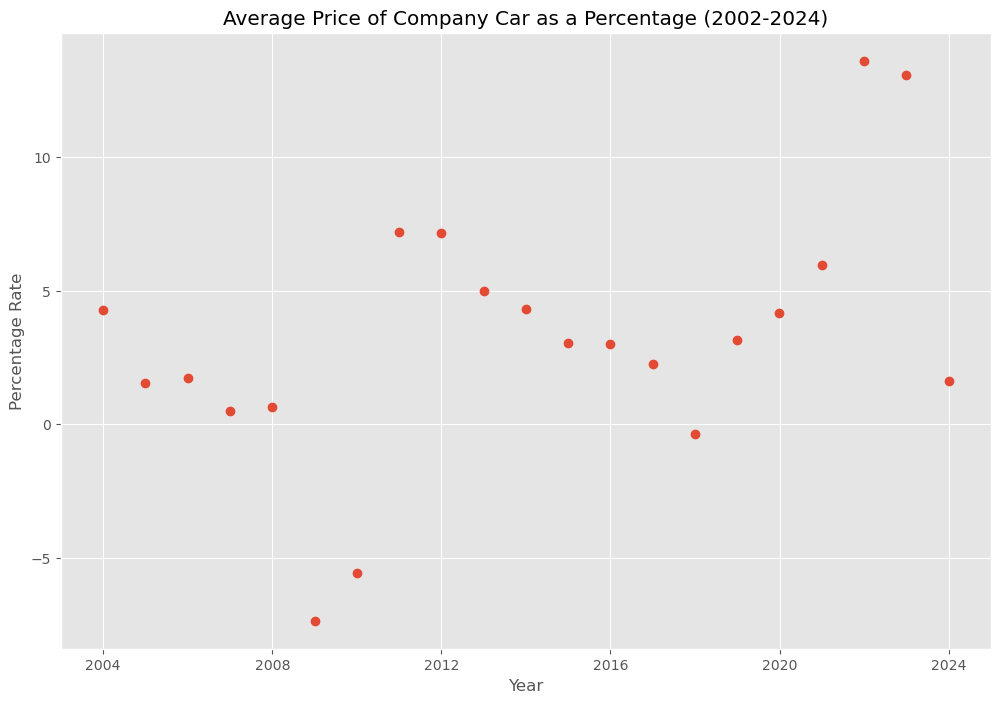

In [591]:
#Plot the 'Percentage Difference Yearly' column against the 'Date' column.
time_series(sales_data_month_year.index, sales_data_month_year['Percentage Difference Yearly'], 'Average Price of Company Car as a Percentage (2002-2024)', 'Year','Percentage Rate')

In [592]:
#There are two choices when looking at inflation
#1 Convert the monthly rate of inflation to a yearly rate 
#2 Find the yearly rate of inflation with a new dataset
#I am going to import the yearly inflation rate instead of changing the monthly to yearly
#Import the data from URL: https://data.bls.gov/pdq/SurveyOutputServlet
yearly_inflation_rate = pd.read_excel('Yearly Inflation Rate.xlsx')
yearly_inflation_rate

,Year,Value
0,2002,2.4
1,2003,1.4
2,2004,1.8
3,2005,2.2
4,2006,2.5
5,2007,2.3
6,2008,2.3
7,2009,1.7
8,2010,1.0
9,2011,1.7


In [593]:
#As you can see the Year needs to be converted to date similar to the above table
yearly_inflation_rate.index = pd.to_datetime(yearly_inflation_rate['Year'], format='%Y')
yearly_inflation_rate.set_index(yearly_inflation_rate.index, inplace=True)
yearly_inflation_rate = pd.DataFrame(yearly_inflation_rate)
yearly_inflation_rate

,Year,Value
Year,,
2002-01-01,2002,2.4
2003-01-01,2003,1.4
2004-01-01,2004,1.8
2005-01-01,2005,2.2
2006-01-01,2006,2.5
2007-01-01,2007,2.3
2008-01-01,2008,2.3
2009-01-01,2009,1.7
2010-01-01,2010,1.0


In [594]:
#Drop the uneccessary columns in the 'Yearly Inflation Rate' dataframe
yearly_inflation_rate.drop(columns='Year',inplace=True)
yearly_inflation_rate

,Value
Year,
2002-01-01,2.4
2003-01-01,1.4
2004-01-01,1.8
2005-01-01,2.2
2006-01-01,2.5
2007-01-01,2.3
2008-01-01,2.3
2009-01-01,1.7
2010-01-01,1.0


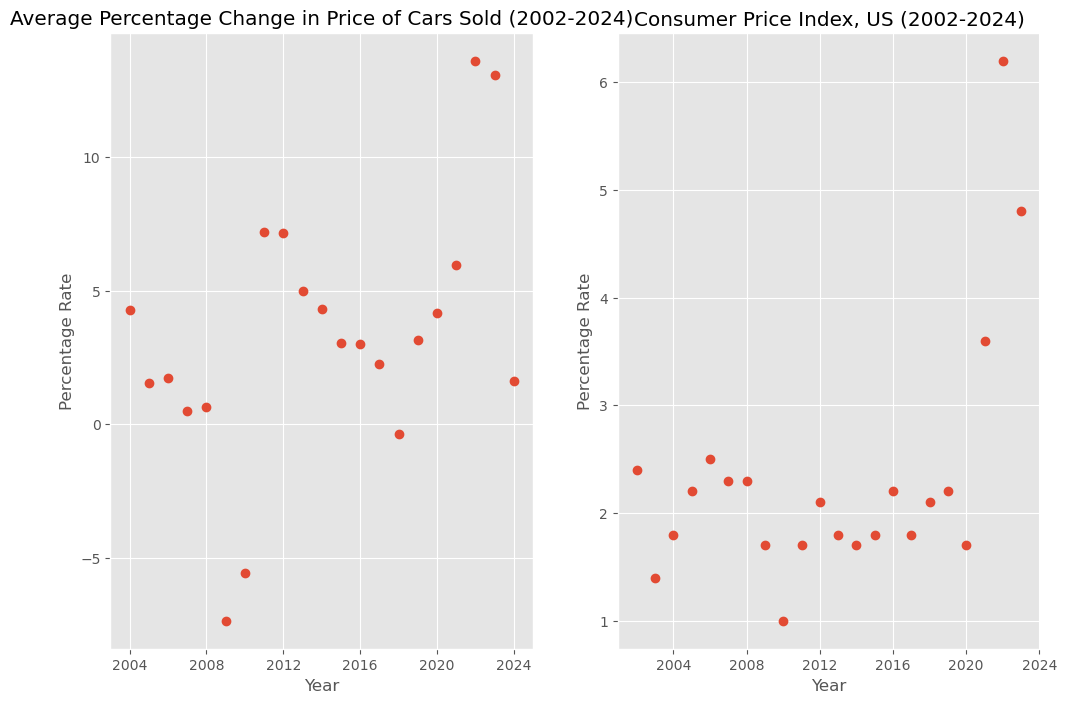

In [595]:
#Create a subplot of 'Average Percent Increase of Price of Cars Sold (2002-2024) and 'Consumer Price Index
plt.subplot(1,2,1)
time_series(sales_data_month_year.index, sales_data_month_year['Percentage Difference Yearly'], 'Average Percentage Change in Price of Cars Sold (2002-2024)', 'Year','Percentage Rate')

plt.subplot(1,2,2)
time_series(yearly_inflation_rate.index, yearly_inflation_rate['Value'], 'Consumer Price Index, US (2002-2024)', 'Year', 'Percentage Rate')

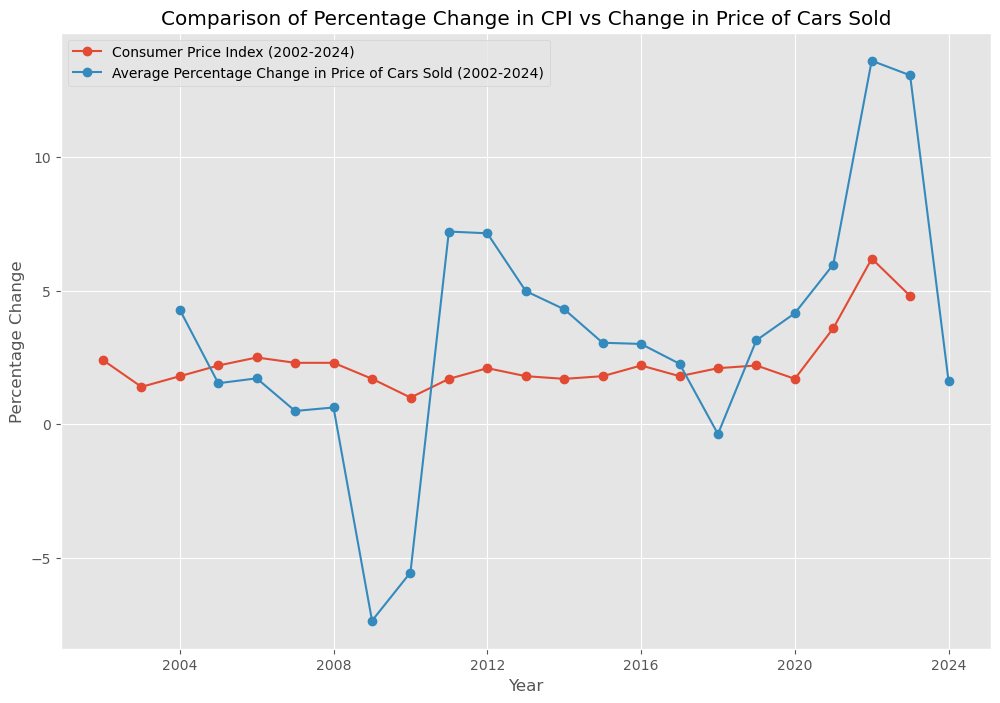

In [596]:
#Put two time series graphs on the same axes
plt.plot(yearly_inflation_rate.index, yearly_inflation_rate['Value'], label = 'Consumer Price Index (2002-2024)', marker='o')
plt.plot(sales_data_month_year.index, sales_data_month_year['Percentage Difference Yearly'], label = 'Average Percentage Change in Price of Cars Sold (2002-2024)', marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Comparison of Percentage Change in CPI vs Change in Price of Cars Sold')
plt.legend()

In [597]:
#There is a pretty similar relationship
#I am going to combine the sales_data_month_year with yearly_inflation_rate to create a new dataframe called year_to_year_data
# Assuming 'Value' is the column you want to add to sales_data_month_year

# Assuming 'Date' is the index of the dataframe
sales_data_month_year.index = np.where(sales_data_month_year.index.month == 12, sales_data_month_year.index + pd.DateOffset(days=1), sales_data_month_year.index)
sales_data_month_year

sales_data_month_year['Inflation Rate'] = yearly_inflation_rate['Value']

# Concatenate the dataframes along rows (axis=0)
year_to_year_data = pd.concat([sales_data_month_year, yearly_inflation_rate['Value']], axis=0)

year_to_year_data

,Average Price,Percentage Difference Yearly,Inflation Rate,0
2003-01-01,13734.453330,NaN,1.4,NaN
2004-01-01,14323.490005,4.288752,1.8,NaN
2005-01-01,14543.437484,1.535572,2.2,NaN
2006-01-01,14793.510397,1.719490,2.5,NaN
2007-01-01,14867.211868,0.498201,2.3,NaN
2008-01-01,14960.669905,0.628618,2.3,NaN
2009-01-01,13860.835066,-7.351508,1.7,NaN
2010-01-01,13091.768149,-5.548489,1.0,NaN
2011-01-01,14036.054864,7.212828,1.7,NaN
2012-01-01,15039.246527,7.147248,2.1,NaN


In [598]:
#Drop the rows from 2024 onwards as it just repeats the same data, the inflation rate from 2002 is not important in this table
#Drop the column labelled '0'
year_to_year_data = year_to_year_data.iloc[:22]
# Assuming you want to drop the column at index 2
year_to_year_data = year_to_year_data.drop(year_to_year_data.columns[3], axis=1)
year_to_year_data

,Average Price,Percentage Difference Yearly,Inflation Rate
2003-01-01,13734.453330,NaN,1.4
2004-01-01,14323.490005,4.288752,1.8
2005-01-01,14543.437484,1.535572,2.2
2006-01-01,14793.510397,1.719490,2.5
2007-01-01,14867.211868,0.498201,2.3
2008-01-01,14960.669905,0.628618,2.3
2009-01-01,13860.835066,-7.351508,1.7
2010-01-01,13091.768149,-5.548489,1.0
2011-01-01,14036.054864,7.212828,1.7
2012-01-01,15039.246527,7.147248,2.1


In [599]:
#Then we can create a residual plot and see how closely the growth compares of inflation vs the increase in price of cars

In [600]:
#Ask the question why has the price of cars increased 

In [601]:
#Import the total sales of cars in the US from 2002-2024 on a monthly basis
#This is taken from Fred Economic Data
#URL: https://fred.stlouisfed.org/series/TOTALSA
#The TOTALSA is in Millions of Units so 16.523 is 16,523,000 units sold that month
industry_sales_month = pd.read_csv('Car_Sales.csv')
industry_sales_month

,DATE,TOTALSA
0,2002-01-01,16.523
1,2002-02-01,17.304
2,2002-03-01,17.107
3,2002-04-01,17.668
4,2002-05-01,16.197
...,...,...
258,2023-07-01,16.446
259,2023-08-01,15.838
260,2023-09-01,16.160
261,2023-10-01,15.897


In [602]:
#Import the total sales of cars in the US from 2002-2024 on a yearly basis
#This is taken from Fred Economic Data
#URL: https://fred.stlouisfed.org/series/TOTALSA#0
#The TOTALSA is in Millions of Units so 16.523 is 16,523,000 units sold that month
industry_sales_year = pd.read_csv('Car_Sales_Year.csv')
industry_sales_year

,DATE,TOTALSA
0,2002-01-01,17.138167
1,2003-01-01,16.966417
2,2004-01-01,17.295833
3,2005-01-01,17.446167
4,2006-01-01,17.049250
5,2007-01-01,16.462083
6,2008-01-01,13.493083
7,2009-01-01,10.601417
8,2010-01-01,11.772083
9,2011-01-01,13.049083


In [603]:
#Make the 'DATE' column the new index for dataframe 'industry_sales_month'
industry_sales_month.set_index(industry_sales_month.index, inplace=True)
industry_sales_month.drop(columns='DATE', inplace=True)

In [604]:
#Make the 'DATE' column the new index for dataframe 'industry_sales_year'
industry_sales_year.set_index(industry_sales_year.index, inplace=True)
industry_sales_year.drop(columns='DATE', inplace=True)
sales_data_month_year

,Average Price,Percentage Difference Yearly,Inflation Rate
2003-01-01,13734.453330,NaN,1.4
2004-01-01,14323.490005,4.288752,1.8
2005-01-01,14543.437484,1.535572,2.2
2006-01-01,14793.510397,1.719490,2.5
2007-01-01,14867.211868,0.498201,2.3
2008-01-01,14960.669905,0.628618,2.3
2009-01-01,13860.835066,-7.351508,1.7
2010-01-01,13091.768149,-5.548489,1.0
2011-01-01,14036.054864,7.212828,1.7
2012-01-01,15039.246527,7.147248,2.1


In [605]:
#From the sales_data_month_year dataframe it is not clear that 2003-01-01 is actually the calendar year of 2002 Jan to 2002 Dec
#To combine the data that has been imported I am going to remove a year off of the sales_data_month_year
sales_data_month_year.index = sales_data_month_year.index - pd.DateOffset(years=1)
sales_data_month_year

,Average Price,Percentage Difference Yearly,Inflation Rate
2002-01-01,13734.453330,NaN,1.4
2003-01-01,14323.490005,4.288752,1.8
2004-01-01,14543.437484,1.535572,2.2
2005-01-01,14793.510397,1.719490,2.5
2006-01-01,14867.211868,0.498201,2.3
2007-01-01,14960.669905,0.628618,2.3
2008-01-01,13860.835066,-7.351508,1.7
2009-01-01,13091.768149,-5.548489,1.0
2010-01-01,14036.054864,7.212828,1.7
2011-01-01,15039.246527,7.147248,2.1


In [606]:
sales_data_month

,New,Used,Total Sales New,Total Sales Used,Total Cars,Total Sales,Average Price,Percentage Difference Monthly
Date,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,14086.825725,NaN
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,13067.278095,-7.237597
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,13169.907557,0.785393
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,13290.149965,0.913009
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,13249.215753,-0.308004
...,...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,26137.254232,-0.222880
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,27479.401321,5.134996
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,27112.071755,-1.336745


In [607]:
# Create an empty DataFrame to store the yearly totals for each column
sales_data_month_year = pd.DataFrame(index=sales_data_month.index.year.unique())

# Iterate through each column of sales_data_month
for column in sales_data_month.columns:
    # Check if the column is numeric (assuming you want to calculate totals for numeric columns)
    if pd.api.types.is_numeric_dtype(sales_data_month[column]):
        # Calculate the yearly totals for the current column and store in yearly_totals_df
        sales_data_month_year[column] = sales_data_month.groupby(sales_data_month.index.year)[column].sum()

# Display the resulting DataFrame with yearly totals for each column
print(sales_data_month_year)

         New    Used  Total Sales New  Total Sales Used  Total Cars  \
Date                                                                  
2002  402164  656089       9572554876        4940209772     1058253   
2003  428252  675358      10623148339        5166071497     1103610   
2004  428508  699677      10972956024        5385548947     1128185   
2005  421834  703835      11006733922        5639803515     1125669   
2006  399282  696968      10411657206        5865687318     1096250   
2007  378184  678549       9997917483        5794213869     1056733   
2008  309159  617885       7975401987        4896167840      927044   
2009  248928  608889       6686217914        4510040527      857817   
2010  268022  626045       7460915522        5054802303      894067   
2011  287669  625728       8331732402        5345074083      913397   
2012  316762  627678       9284994339        5582127071      944440   
2013  335209  644755      10113490016        5976130047      979964   
2014  

In [608]:
'''yearly_totals = sales_data_month.groupby(sales_data_month.index.year)['New'].sum()
yearly_totals.index = pd.to_datetime(yearly_totals.index, format='%Y')
yearly_totals'''

"yearly_totals = sales_data.groupby(sales_data.index.year)['New'].sum()\nyearly_totals.index = pd.to_datetime(yearly_totals.index, format='%Y')\nyearly_totals"

In [609]:
#I am going to add the rest of the factors from the original table to the year dataframe
#This includes adding the new, used, total sales new, total sales used and total cars
#I then want to add this to the sales_data_month_year dataframe
# Group by year and sum the relevant columns in the 'sales_data_month' dataframe
# Group by year, calculate the mean, and then assign to 'New' column in 'sales_data_month_year'
sales_data_month_year['New'] = sales_data_month['New'].resample('Y').mean()

'''
sales_data_month_year['Used'] = sales_data_month['Used'].resample('Y').mean().sum()
sales_data_month_year['Total Sales New'] = sales_data_month['Total Sales New'].resample('Y').mean().sum()
sales_data_month_year['Total Sales Old'] = sales_data_month['Total Sales Used'].resample('Y').mean().sum()
sales_data_month_year['Total Cars'] = sales_data_month['Total Cars'].resample('Y').mean().sum()
sales_data_month_year
'''
sales_data_month_year['New']


Date
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
2007   NaN
2008   NaN
2009   NaN
2010   NaN
2011   NaN
2012   NaN
2013   NaN
2014   NaN
2015   NaN
2016   NaN
2017   NaN
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
2023   NaN
Name: New, dtype: float64

In [610]:
sales_data_month

,New,Used,Total Sales New,Total Sales Used,Total Cars,Total Sales,Average Price,Percentage Difference Monthly
Date,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,14086.825725,NaN
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,13067.278095,-7.237597
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,13169.907557,0.785393
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,13290.149965,0.913009
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,13249.215753,-0.308004
...,...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,26137.254232,-0.222880
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,27479.401321,5.134996
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,27112.071755,-1.336745


In [611]:
#Can do a machine learning algorithm that takes data from 2002-2012 
#then compare that with how it predicts 2012-2022 and compare that to the results we got